# **Transaction Return Patterns**

### **Problem Steatment**

Meningkatnya volume transaksi tidak selalu berbanding lurus dengan keuntungan, karena tingginya angka retur dapat mengurangi efektivitas penjualan dan berdampak pada kepuasan pelanggan. Perusahaan kerap kesulitan mengidentifikasi pola retur yang muncul. Tanpa pemetaan yang jelas terhadap pola retur ini, strategi perbaikan layanan dan pengelolaan operasional berisiko tidak tepat sasaran, sehingga potensi kerugian tetap berulang dan loyalitas pelanggan melemah.

### **Objective**

- Mengidentifikasi perbandingan transaksi berhasil dan retur untuk memahami tingkat efektivitas penjualan.
- Mengevaluasi pola retur berdasarkan channel, kategori produk, demografi pelanggan, lokasi, serta toko (StoreID).
- Menganalisis kecenderungan retur terkait metode pembayaran dan opsi pengiriman untuk menemukan area perbaikan layanan.

### **Variabel Yang Tersedia**

Dari dataset yang dimiliki terdapat beberapa data yang tersedia:


---

**1. TransactionID:** adalah nomor unik yang diberikan untuk setiap transaksi.\
**2. Date:** Tanggal transaksi dalam format YYYY-MM-DD.\
**3. Time:** Waktu transaksi dalam format HH:MM:SS.\
**4. CustomerID:** ID unik untuk setiap pelanggan.\
**5. Age:** Usia pelanggan.\
**6. Gender:** Jenis kelamin pelanggan: Male, Female, atau Other.\
**7. Location:** Kota atau daerah tempat transaksi dilakukan.\
**8. StoreID:** ID unik toko fisik (jika pembelian dilakukan secara offline).\
**9. OnlineOrderFlag:** Menunjukkan apakah transaksi dilakukan secara online (True) atau offline (False).\
**10. ProductID:** ID unik dari produk yang dibeli.\
**11. ProductName:** Nama produk yang dibeli.\
**12. Category:** Kategori produk, misalnya: Electronics, Clothing, Toys, Food, Decorations.\
**13. Quantity:** Jumlah unit produk yang dibeli dalam transaksi tersebut.\
**14. UnitPrice:** Harga per unit dari produk yang dibeli.\
**15. TotalPrice:** Total harga produk dalam satu transaksi, dihitung sebagai Quantity × UnitPrice.\
**16. PaymentType:** Jenis metode pembayaran yang digunakan: Credit Card, Debit Card, Cash, atau Online Payment.\
**17. PromotionApplied:** Menunjukkan apakah ada promosi yang diterapkan dalam transaksi tersebut (True atau False).\
**18. DiscountAmount:** Jumlah nominal potongan harga yang diberikan (jika ada).\
**19. GiftWrap:** Menunjukkan apakah produk dibungkus sebagai hadiah (True atau False).\
**20. ShippingMethod:** Metode pengiriman yang digunakan untuk pembelian online, seperti Standard, Express, atau Overnight.\
**21. DeliveryTime:** Lama waktu pengiriman (dalam hari) untuk transaksi online.\
**22. Weather:** Kondisi cuaca saat transaksi berlangsung, seperti Sunny, Rainy, atau Snowy.\
**23. Event:** Acara khusus atau hari besar yang terjadi pada hari transaksi, misalnya Black Friday atau Christmas Market.\
**24. CustomerSatisfaction:** Tingkat kepuasan pelanggan terhadap transaksi, dinilai dari skala 1 hingga 5.\
**25. ReturnFlag:** Menunjukkan apakah produk dikembalikan (True) atau tidak (False).

### **Import Package**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats

### **Import Data**

In [3]:
df = pd.read_csv('Christmas Sales.csv', header=0)

In [4]:
pd.set_option('display.max_column',None)

### **Data Understanding**

In [5]:
# DataFrame
df.head()

,TransactionID,Date,Time,CustomerID,Age,Gender,Location,StoreID,OnlineOrderFlag,ProductID,ProductName,Category,Quantity,UnitPrice,TotalPrice,PaymentType,PromotionApplied,DiscountAmount,GiftWrap,ShippingMethod,DeliveryTime,Weather,Event,CustomerSatisfaction,ReturnFlag
0,1,12/24/2020,7:27:59,441,27,Other,City_15,NaN,True,106,Toys_Product,Toys,5,96.786255,483.931273,Credit Card,False,0.0,False,Standard,5.0,Snowy,NaN,5,False
1,2,11/18/2022,14:36:39,340,43,Male,City_13,NaN,True,816,Clothing_Product,Clothing,1,95.279579,95.279579,Credit Card,True,0.0,True,Express,3.0,Sunny,NaN,2,True
2,3,12/26/2019,20:23:50,31,25,Other,City_7,92.0,False,508,Clothing_Product,Clothing,2,52.371645,104.743291,Credit Card,False,0.0,False,NaN,NaN,Rainy,Christmas Market,4,False
3,4,11/13/2018,23:08:08,39,64,Male,City_20,100.0,False,710,Toys_Product,Toys,5,63.647293,318.236463,Debit Card,False,0.0,True,NaN,NaN,Rainy,NaN,1,True
4,5,12/13/2020,4:38:08,344,26,Other,City_10,90.0,False,687,Toys_Product,Toys,3,57.384041,172.152122,Cash,False,0.0,True,NaN,NaN,Sunny,Christmas Market,4,False


In [6]:
# Info Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionID         10000 non-null  int64  
 1   Date                  10000 non-null  object 
 2   Time                  10000 non-null  object 
 3   CustomerID            10000 non-null  int64  
 4   Age                   10000 non-null  int64  
 5   Gender                10000 non-null  object 
 6   Location              10000 non-null  object 
 7   StoreID               4582 non-null   float64
 8   OnlineOrderFlag       10000 non-null  bool   
 9   ProductID             10000 non-null  int64  
 10  ProductName           10000 non-null  object 
 11  Category              10000 non-null  object 
 12  Quantity              10000 non-null  int64  
 13  UnitPrice             10000 non-null  float64
 14  TotalPrice            10000 non-null  float64
 15  PaymentType         

In [7]:
# Statistika Deskriptif
df.describe().round(2)

,TransactionID,CustomerID,Age,StoreID,ProductID,Quantity,UnitPrice,TotalPrice,DiscountAmount,DeliveryTime,CustomerSatisfaction
count,10000.00,10000.00,10000.00,4582.00,10000.00,10000.00,10000.00,10000.00,10000.00,5418.00,10000.00
mean,5000.50,251.93,43.79,50.92,500.23,3.01,54.96,165.43,6.95,3.00,2.98
std,2886.90,145.00,15.37,28.86,288.74,1.40,26.24,116.11,11.08,1.42,1.42
min,1.00,1.00,18.00,1.00,1.00,1.00,10.00,10.02,0.00,1.00,1.00
25%,2500.75,127.00,30.00,26.00,252.00,2.00,32.05,71.90,0.00,2.00,2.00
50%,5000.50,254.00,44.00,51.00,500.00,3.00,55.04,136.29,0.00,3.00,3.00
75%,7500.25,379.00,57.00,76.00,750.00,4.00,77.85,241.05,10.41,4.00,4.00
max,10000.00,500.00,70.00,100.00,1000.00,5.00,100.00,499.98,49.95,5.00,5.00


In [8]:
# Hubungan data dengan missing value
print(df[['CustomerID','OnlineOrderFlag','StoreID','ShippingMethod','DeliveryTime']])

      CustomerID  OnlineOrderFlag  StoreID ShippingMethod  DeliveryTime
0            441             True      NaN       Standard           5.0
1            340             True      NaN        Express           3.0
2             31            False     92.0            NaN           NaN
3             39            False    100.0            NaN           NaN
4            344            False     90.0            NaN           NaN
...          ...              ...      ...            ...           ...
9995         245             True      NaN        Express           4.0
9996         295             True      NaN        Express           5.0
9997         202            False     22.0            NaN           NaN
9998         310             True      NaN        Express           1.0
9999         469             True      NaN      Overnight           2.0

[10000 rows x 5 columns]


Missing value pada kolom StoreID, ShippingMethod, dan DeliveryTime merupakan konsekuensi logis dari jenis transaksi yang terjadi.
* Transaksi online (OnlineOrderFlag = TRUE) secara alami tidak memiliki StoreID karena tidak ada toko fisik yang terlibat.
* Sebaliknya, transaksi yang dilakukan langsung di toko (OnlineOrderFlag = FALSE) tidak memerlukan ShippingMethod dan DeliveryTime karena pelanggan langsung membawa pulang produk yang dibeli.

### **Data Preparation**

In [9]:
# Cek Data Duplicate
df.duplicated().sum()

np.int64(0)

In [10]:
# Cek Missing Value
print(df.isnull().sum())

TransactionID              0
Date                       0
Time                       0
CustomerID                 0
Age                        0
Gender                     0
Location                   0
StoreID                 5418
OnlineOrderFlag            0
ProductID                  0
ProductName                0
Category                   0
Quantity                   0
UnitPrice                  0
TotalPrice                 0
PaymentType                0
PromotionApplied           0
DiscountAmount             0
GiftWrap                   0
ShippingMethod          4582
DeliveryTime            4582
Weather                    0
Event                   2838
CustomerSatisfaction       0
ReturnFlag                 0
dtype: int64


In [11]:
# Salin dataframe untuk pembersihan data
df_clean = df.copy()

# Mengganti missing value dengan nilai tertentu
df_clean.fillna({
    'ShippingMethod': 'No Shipping',
    'DeliveryTime': 0,
    'StoreID': 'Online',
    'Event': 'No Event'
}, inplace=True)

# Mengubah tipe data
df_clean = df_clean.astype({
    'TransactionID': str,
    'CustomerID': str,
    'StoreID': str,
    'ProductID': str
})

# Mengubah kolom Date ke format datetime
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

# Menambahkan kolom Year dan Month
df_clean['Year'] = df_clean['Date'].dt.year
df_clean['Month'] = df_clean['Date'].dt.month

# Menghapus kolom redundant (ProductName)
df_clean.drop(columns=['ProductName'], inplace=True)

In [12]:
# Cek transaksi online yang tidak memiliki ShippingMethod
inconsistent_online = df_clean[(df_clean['OnlineOrderFlag'] == True) &
                              (df_clean['ShippingMethod'] == 'No Shipping')]

print(f"Jumlah transaksi online tanpa ShippingMethod: {len(inconsistent_online)}")

Jumlah transaksi online tanpa ShippingMethod: 0


In [13]:
# Cek Konsistensi TotalPrice dengan Quantity dan UnitPrice
CalculatedTotal = df_clean['Quantity'] * df_clean['UnitPrice']
inconsistent_prices = df_clean[abs(df_clean['TotalPrice'] - CalculatedTotal) != 0]

print(f"Jumlah transaksi dengan perhitungan harga tidak konsisten: {len(inconsistent_prices)}")

Jumlah transaksi dengan perhitungan harga tidak konsisten: 6091


In [14]:
# Mengganti seluruh nilai pada TotalPrice dengan CalculatedTotal
df_clean['TotalPrice'] = CalculatedTotal

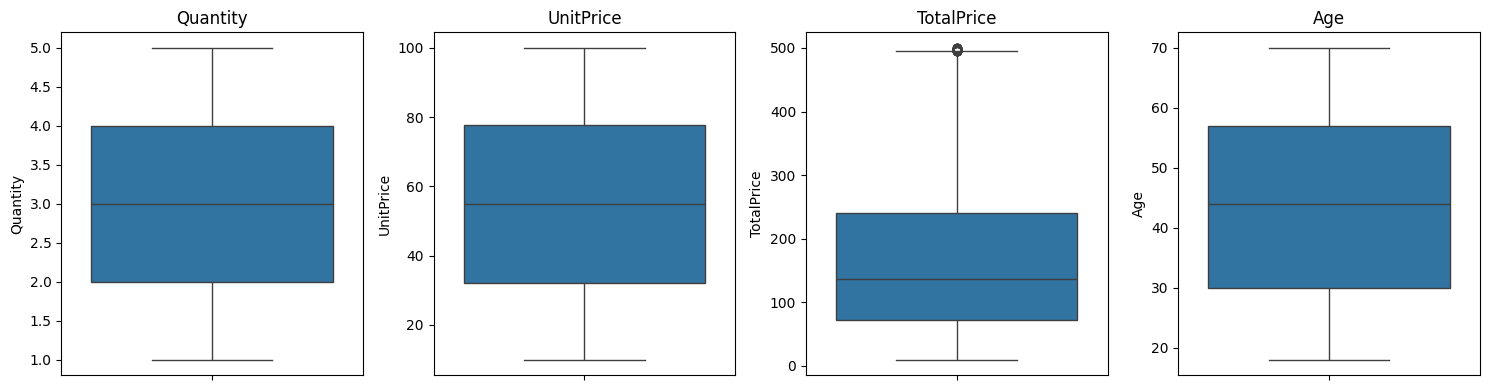

In [15]:
# Cek outlier untuk kolom numerik
numeric_cols = ['Quantity', 'UnitPrice', 'TotalPrice', 'Age']

plt.figure(figsize=(15,4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(y=df_clean[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [16]:
print(df_clean.isnull().sum())

TransactionID           0
Date                    0
Time                    0
CustomerID              0
Age                     0
Gender                  0
Location                0
StoreID                 0
OnlineOrderFlag         0
ProductID               0
Category                0
Quantity                0
UnitPrice               0
TotalPrice              0
PaymentType             0
PromotionApplied        0
DiscountAmount          0
GiftWrap                0
ShippingMethod          0
DeliveryTime            0
Weather                 0
Event                   0
CustomerSatisfaction    0
ReturnFlag              0
Year                    0
Month                   0
dtype: int64


In [17]:
df_clean.head()

,TransactionID,Date,Time,CustomerID,Age,Gender,Location,StoreID,OnlineOrderFlag,ProductID,Category,Quantity,UnitPrice,TotalPrice,PaymentType,PromotionApplied,DiscountAmount,GiftWrap,ShippingMethod,DeliveryTime,Weather,Event,CustomerSatisfaction,ReturnFlag,Year,Month
0,1,2020-12-24,7:27:59,441,27,Other,City_15,Online,True,106,Toys,5,96.786255,483.931273,Credit Card,False,0.0,False,Standard,5.0,Snowy,No Event,5,False,2020,12
1,2,2022-11-18,14:36:39,340,43,Male,City_13,Online,True,816,Clothing,1,95.279579,95.279579,Credit Card,True,0.0,True,Express,3.0,Sunny,No Event,2,True,2022,11
2,3,2019-12-26,20:23:50,31,25,Other,City_7,92.0,False,508,Clothing,2,52.371645,104.743291,Credit Card,False,0.0,False,No Shipping,0.0,Rainy,Christmas Market,4,False,2019,12
3,4,2018-11-13,23:08:08,39,64,Male,City_20,100.0,False,710,Toys,5,63.647293,318.236463,Debit Card,False,0.0,True,No Shipping,0.0,Rainy,No Event,1,True,2018,11
4,5,2020-12-13,4:38:08,344,26,Other,City_10,90.0,False,687,Toys,3,57.384041,172.152122,Cash,False,0.0,True,No Shipping,0.0,Sunny,Christmas Market,4,False,2020,12


In [18]:
df_clean.describe().round(2)

,Date,Age,Quantity,UnitPrice,TotalPrice,DiscountAmount,DeliveryTime,CustomerSatisfaction,Year,Month
count,10000,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,2021-05-31 23:03:41.760000256,43.79,3.01,54.96,165.43,6.95,1.63,2.98,2020.50,11.5
min,2018-11-01 00:00:00,18.00,1.00,10.00,10.02,0.00,0.00,1.00,2018.00,11.0
25%,2019-12-02 00:00:00,30.00,2.00,32.05,71.90,0.00,0.00,2.00,2019.00,11.0
50%,2021-11-01 00:00:00,44.00,3.00,55.04,136.29,0.00,1.00,3.00,2021.00,12.0
75%,2022-11-30 00:00:00,57.00,4.00,77.85,241.05,10.41,3.00,4.00,2022.00,12.0
max,2023-12-31 00:00:00,70.00,5.00,100.00,499.98,49.95,5.00,5.00,2023.00,12.0
std,NaN,15.37,1.40,26.24,116.11,11.08,1.83,1.42,1.71,0.5


###**Perbandingan Transaksi Berhasil vs Return**

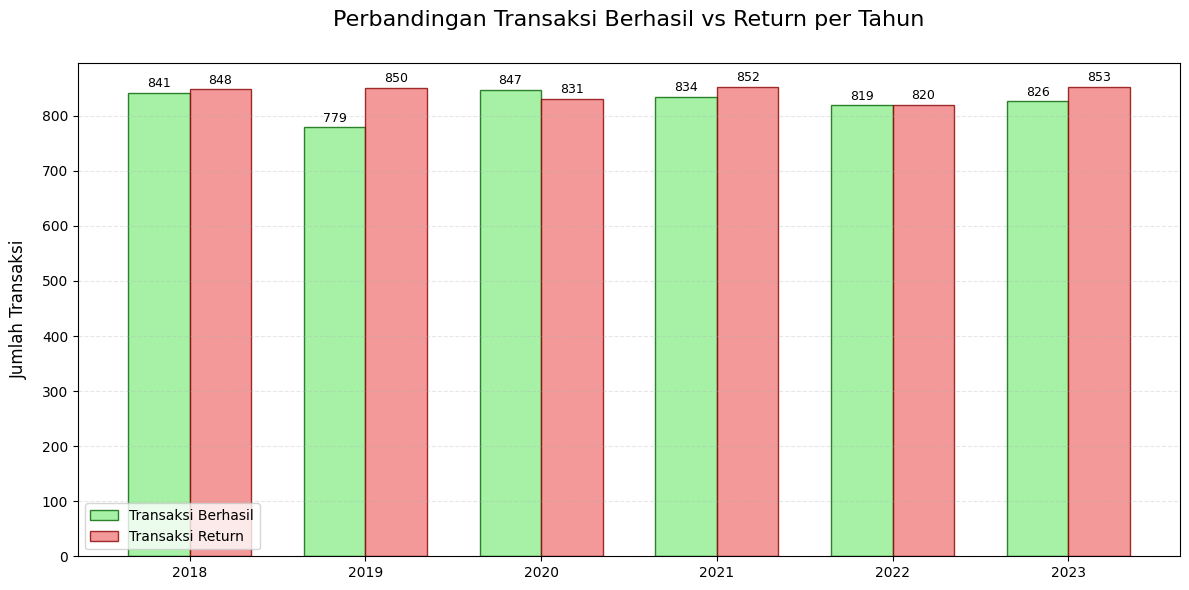


Data Transaksi per Tahun:


,Year,total_transactions,returned_transactions,successful_transactions
0,2018,1689,848,841
1,2019,1629,850,779
2,2020,1678,831,847
3,2021,1686,852,834
4,2022,1639,820,819
5,2023,1679,853,826


In [19]:
# Hitung total transaksi dan transaksi yang dikembalikan per tahun
transaction_analysis = df_clean.groupby('Year').agg(
                       total_transactions=('TransactionID', 'count'),
                       returned_transactions=('ReturnFlag', 'sum')).reset_index()

# Hitung transaksi berhasil (total - return)
transaction_analysis['successful_transactions'] = (transaction_analysis['total_transactions'] -
                                                  transaction_analysis['returned_transactions'])

# Pivot data untuk memudahkan plotting
pivot_data = transaction_analysis[['Year', 'successful_transactions', 'returned_transactions']]
pivot_data = pivot_data.set_index('Year')

# Visualisasi multiple bar chart
plt.figure(figsize=(12, 6))
years = pivot_data.index.astype(str)
x_pos = np.arange(len(years))
width = 0.35

# Plot bar untuk transaksi berhasil dan return
bars1 = plt.bar(x_pos - width/2, pivot_data['successful_transactions'],
                width, label='Transaksi Berhasil', color='lightgreen', edgecolor='darkgreen', alpha=0.8)
bars2 = plt.bar(x_pos + width/2, pivot_data['returned_transactions'],
                width, label='Transaksi Return', color='lightcoral', edgecolor='darkred', alpha=0.8)

plt.title('Perbandingan Transaksi Berhasil vs Return per Tahun\n', fontsize=16, pad=10)
plt.ylabel('Jumlah Transaksi', fontsize=12, labelpad=10)
plt.xlabel('')
plt.xticks(x_pos, years)
plt.legend()
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Tambahkan label nilai di atas setiap bar
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            plt.text(bar.get_x() + bar.get_width()/2., height + 5,
                    f'{height:.0f}', ha='center', va='bottom', fontsize=9)

add_value_labels(bars1)
add_value_labels(bars2)
plt.tight_layout()
plt.show()

print("\nData Transaksi per Tahun:")
transaction_analysis

- Secara umum, jumlah transaksi retur konsisten lebih tinggi dibandingkan transaksi berhasil hampir di setiap tahun.
- Tahun 2019 menunjukkan gap terbesar, dengan retur jauh lebih tinggi daripada transaksi berhasil.
- Tahun 2020 relatif lebih seimbang, di mana transaksi berhasil sedikit lebih tinggi dibandingkan retur.
- Tahun 2022 proporsi retur masih tinggi, meskipun jumlahnya hampir seimbang dengan transaksi berhasil.
- Tahun 2023 kembali menunjukkan tren retur yang lebih tinggi dibandingkan transaksi berhasil.

###**Performa Retur Berdasarkan Channel Penjualan**

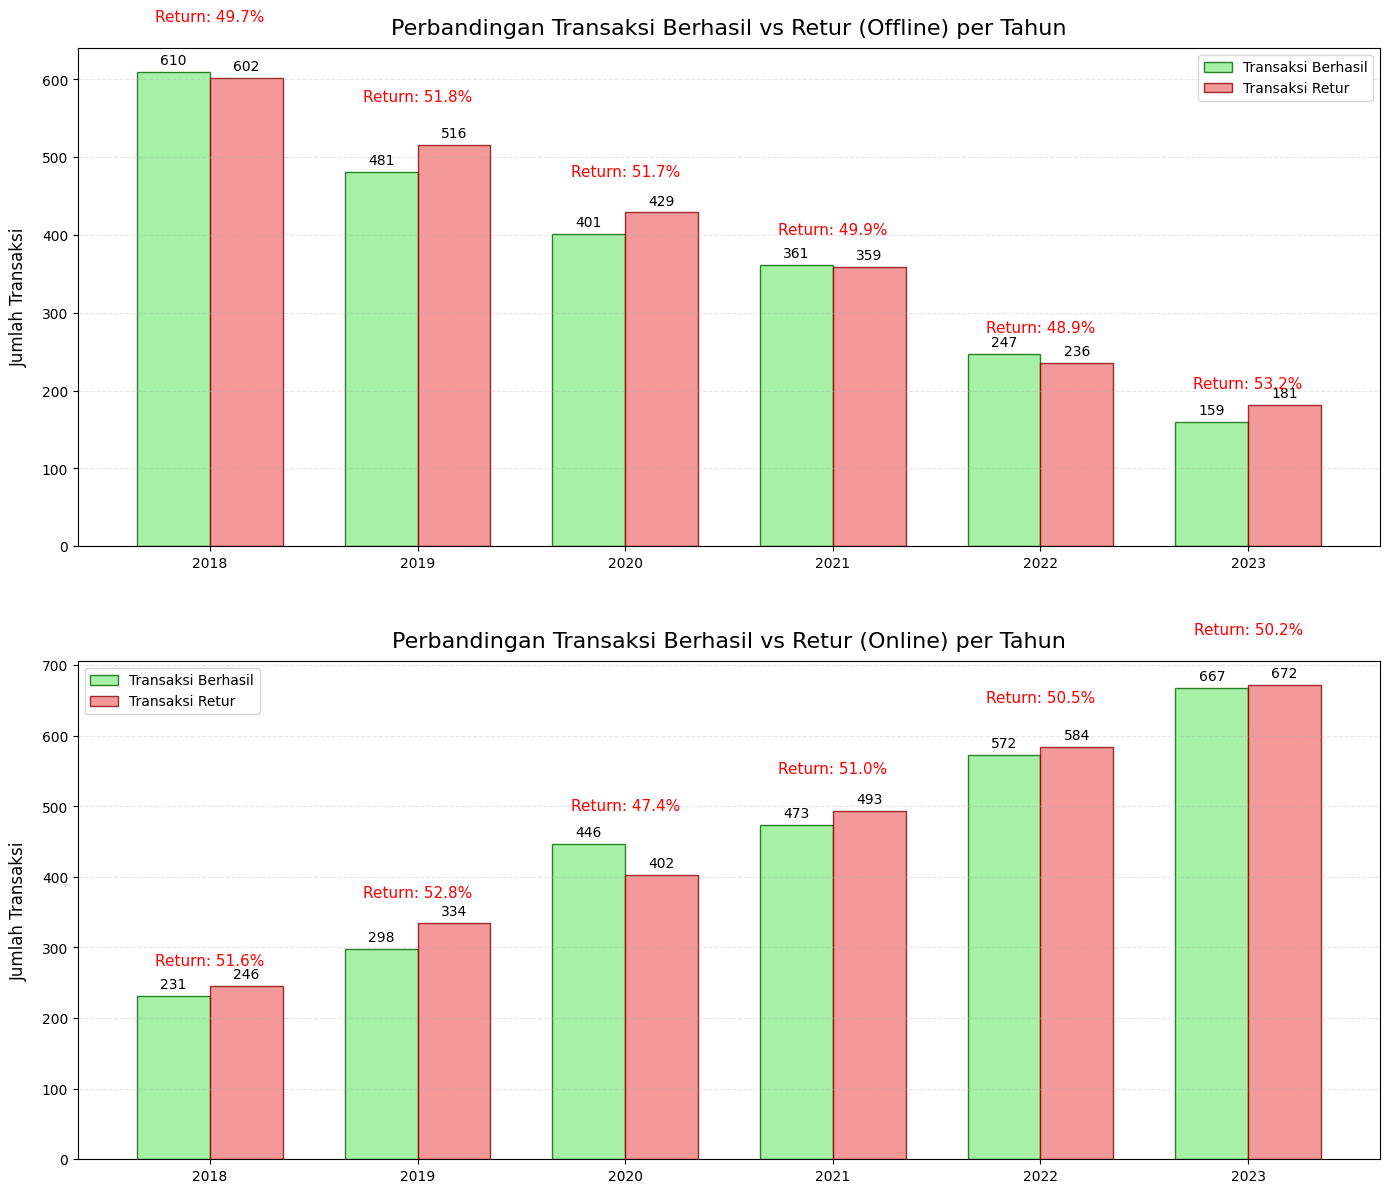

In [20]:
# Filter data: offline dan online
offline_data = df_clean[df_clean['OnlineOrderFlag'] == False]
online_data = df_clean[df_clean['OnlineOrderFlag'] == True]

# Hitung untuk offline
offline_analysis = offline_data.groupby('Year').agg(
                   total_transactions=('TransactionID', 'count'),
                   returned_transactions=('ReturnFlag', 'sum')).reset_index()

offline_analysis['successful_transactions'] = offline_analysis['total_transactions'] - offline_analysis['returned_transactions']
offline_analysis['return_percentage'] = (offline_analysis['returned_transactions'] / offline_analysis['total_transactions']) * 100
offline_analysis['type'] = 'Offline'

# Hitung untuk online
online_analysis = online_data.groupby('Year').agg(
                  total_transactions=('TransactionID', 'count'),
                  returned_transactions=('ReturnFlag', 'sum')).reset_index()

online_analysis['successful_transactions'] = online_analysis['total_transactions'] - online_analysis['returned_transactions']
online_analysis['return_percentage'] = (online_analysis['returned_transactions'] / online_analysis['total_transactions']) * 100
online_analysis['type'] = 'Online'

# Buat visualisasi dalam satu frame dengan dua subplot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# Warna konsisten
color_success = 'lightgreen'
color_return = 'lightcoral'
edge_success = 'darkgreen'
edge_return = 'darkred'

# Subplot 1: OFFLINE
x_pos = np.arange(len(offline_analysis['Year']))
width = 0.35

bars_success_offline = ax1.bar(x_pos - width/2, offline_analysis['successful_transactions'], width,
                              label='Transaksi Berhasil', color=color_success, edgecolor=edge_success, alpha=0.8)
bars_return_offline = ax1.bar(x_pos + width/2, offline_analysis['returned_transactions'], width,
                             label='Transaksi Retur', color=color_return, edgecolor=edge_return, alpha=0.8)

ax1.set_title('Perbandingan Transaksi Berhasil vs Retur (Offline) per Tahun', fontsize=16, pad=10)
ax1.set_ylabel('Jumlah Transaksi', fontsize=12, labelpad=10)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(offline_analysis['Year'])
ax1.legend()
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Tambahkan nilai dan persentase untuk offline
for i, (success, return_val, total) in enumerate(zip(offline_analysis['successful_transactions'],
                                                    offline_analysis['returned_transactions'],
                                                    offline_analysis['total_transactions'])):
    return_percentage = (return_val / total) * 100
    ax1.text(i - width/2, success + max(offline_analysis['successful_transactions']) * 0.01,
             f'{int(success)}', ha='center', va='bottom', fontsize=10)
    ax1.text(i + width/2, return_val + max(offline_analysis['returned_transactions']) * 0.01,
             f'{int(return_val)}', ha='center', va='bottom', fontsize=10)
    ax1.text(i, max(success, return_val) * 1.1,
             f'Return: {return_percentage:.1f}%', ha='center', va='bottom',
             fontsize=11, color='red')

# Subplot 2: ONLINE
bars_success_online = ax2.bar(x_pos - width/2, online_analysis['successful_transactions'], width,
                             label='Transaksi Berhasil', color=color_success, edgecolor=edge_success, alpha=0.8)
bars_return_online = ax2.bar(x_pos + width/2, online_analysis['returned_transactions'], width,
                            label='Transaksi Retur', color=color_return, edgecolor=edge_return, alpha=0.8)

ax2.set_title('\n\nPerbandingan Transaksi Berhasil vs Retur (Online) per Tahun', fontsize=16, pad=10)
ax2.set_xlabel('')
ax2.set_ylabel('Jumlah Transaksi', fontsize=12, labelpad=10)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(online_analysis['Year'])
ax2.legend()
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Tambahkan nilai dan persentase untuk online
for i, (success, return_val, total) in enumerate(zip(online_analysis['successful_transactions'],
                                                   online_analysis['returned_transactions'],
                                                   online_analysis['total_transactions'])):
    return_percentage = (return_val / total) * 100
    ax2.text(i - width/2, success + max(online_analysis['successful_transactions']) * 0.01,
             f'{int(success)}', ha='center', va='bottom', fontsize=10)
    ax2.text(i + width/2, return_val + max(online_analysis['returned_transactions']) * 0.01,
             f'{int(return_val)}', ha='center', va='bottom', fontsize=10)
    ax2.text(i, max(success, return_val) * 1.1,
             f'Return: {return_percentage:.1f}%', ha='center', va='bottom',
             fontsize=11, color='red')

plt.tight_layout()
plt.show()

Offline
- Tingkat retur cenderung tinggi dan stabil di kisaran ~50% setiap tahun.
- Tahun 2019–2020 retur lebih dominan dibanding transaksi berhasil.
- Tahun 2021 relatif seimbang (retur hanya sedikit lebih rendah).
- Tahun 2023 kembali menunjukkan lonjakan retur (53,2%), mengindikasikan adanya masalah konsistensi kualitas layanan offline.

Online
- Tren transaksi online meningkat signifikan dari tahun ke tahun.
- Tingkat retur juga relatif tinggi, berada di kisaran 47–53%.
- Tahun 2020 sempat membaik dengan retur lebih rendah (47,4%).
- Tahun 2022–2023 retur naik lagi hingga 50.2%, meskipun demikian penjualan online tetap tumbuh pesat.

###**Persentase Retur Berdasarkan Kategori Produk**

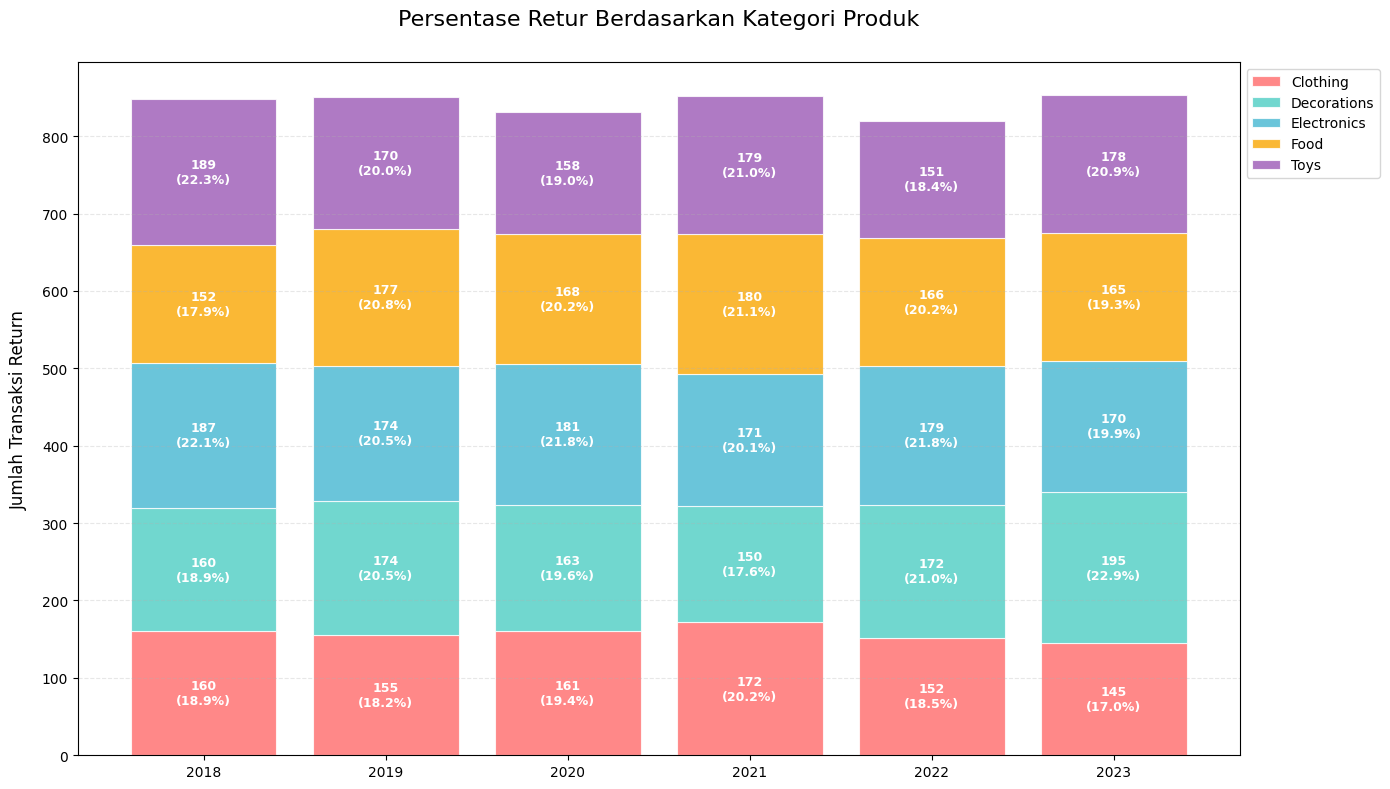

In [21]:
# Group by Year dan Category, hitung return transactions
return_analysis = df_clean.groupby(['Year', 'Category']).agg(returned_transactions=('ReturnFlag', 'sum')).reset_index()

# Hitung total retur per tahun
total_returns_per_year = return_analysis.groupby('Year')['returned_transactions'].sum().reset_index()
total_returns_per_year.columns = ['Year', 'total_returns_year']
return_analysis = return_analysis.merge(total_returns_per_year, on='Year')

# Hitung persentase retur per kategori
return_analysis['return_percentage'] = (return_analysis['returned_transactions'] / return_analysis['total_returns_year']) * 100

# Pivot data untuk stacked bar chart
pivot_data_count = return_analysis.pivot(index='Year', columns='Category', values='returned_transactions').fillna(0)
pivot_data_percentage = return_analysis.pivot(index='Year', columns='Category', values='return_percentage').fillna(0)
all_categories = pivot_data_count.columns.tolist()

# Buat stacked bar chart
plt.figure(figsize=(14, 8))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#F9A602', '#9B59B6']

bottom = np.zeros(len(pivot_data_count))
for i, category in enumerate(all_categories):
    plt.bar(pivot_data_count.index, pivot_data_count[category],
            bottom=bottom,
            label=category,
            color=colors[i],
            edgecolor='white',
            linewidth=0.8,
            alpha=0.8)
    bottom += pivot_data_count[category].values

plt.title('Persentase Retur Berdasarkan Kategori Produk\n', fontsize=16, pad=10)
plt.ylabel('Jumlah Transaksi Return', fontsize=12, labelpad=10)
plt.xlabel('')
plt.xticks(pivot_data_count.index, rotation=0)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Kategori Produk')

# Tambahkan nilai jumlah dan persentase untuk setiap kategori
for year in pivot_data_count.index:
    year_total = total_returns_per_year[total_returns_per_year['Year'] == year]['total_returns_year'].values[0]
    cumulative = 0

    for category in all_categories:
        count = pivot_data_count.loc[year, category]
        percentage = pivot_data_percentage.loc[year, category]

        if count > 0:
            plt.text(year, cumulative + count/2,
                     f'{int(count)}\n({percentage:.1f}%)',
                     ha='center', va='center', fontsize=9, fontweight='bold',
                     color='white')

        cumulative += count

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

- Toys memiliki kontribusi retur cukup tinggi, berkisar 18%–22%, dengan puncak di 2018 (22,3%) dan relatif menurun di 2022 (18,4%) sebelum naik lagi di 2023 (20,9%).
- Decorations bersifat fluktuatif, antara 19%–22,9%, dan di 2023 menjadi kategori retur terbesar (22,9%).
- Electronics relatif stabil di kisaran 20%–22%, tanpa lonjakan ekstrem.
- Clothing menunjukan tren menurun dari 18,9% (2018) ke 17% (2023), artinya kontribusi retur kategori ini makin kecil.
- Food cenderung stabil, berada di kisaran 17,9%–21,1% sepanjang periode.
- Secara umum, tidak ada kategori yang selalu dominan setiap tahun. Namun, Decorations, Toys, dan Electronics sering berada di posisi teratas, sementara Clothing menunjukkan perbaikan signifikan dengan retur yang menurun.

###**Persentase Retur Berdasarkan Segmen Usia dan Gender**

In [22]:
# Segmentasi usia
bins = [0, 12, 19, 35, 55, 100]
labels = ['Anak-anak(< 12)', 'Remaja(13-19)', 'Dewasa Muda(20-35)',
          'Paruh Baya(36-55)', 'Lansia(> 56)']
df_clean['AgeSegment'] = pd.cut(df_clean['Age'], bins=bins, labels=labels, right=False)

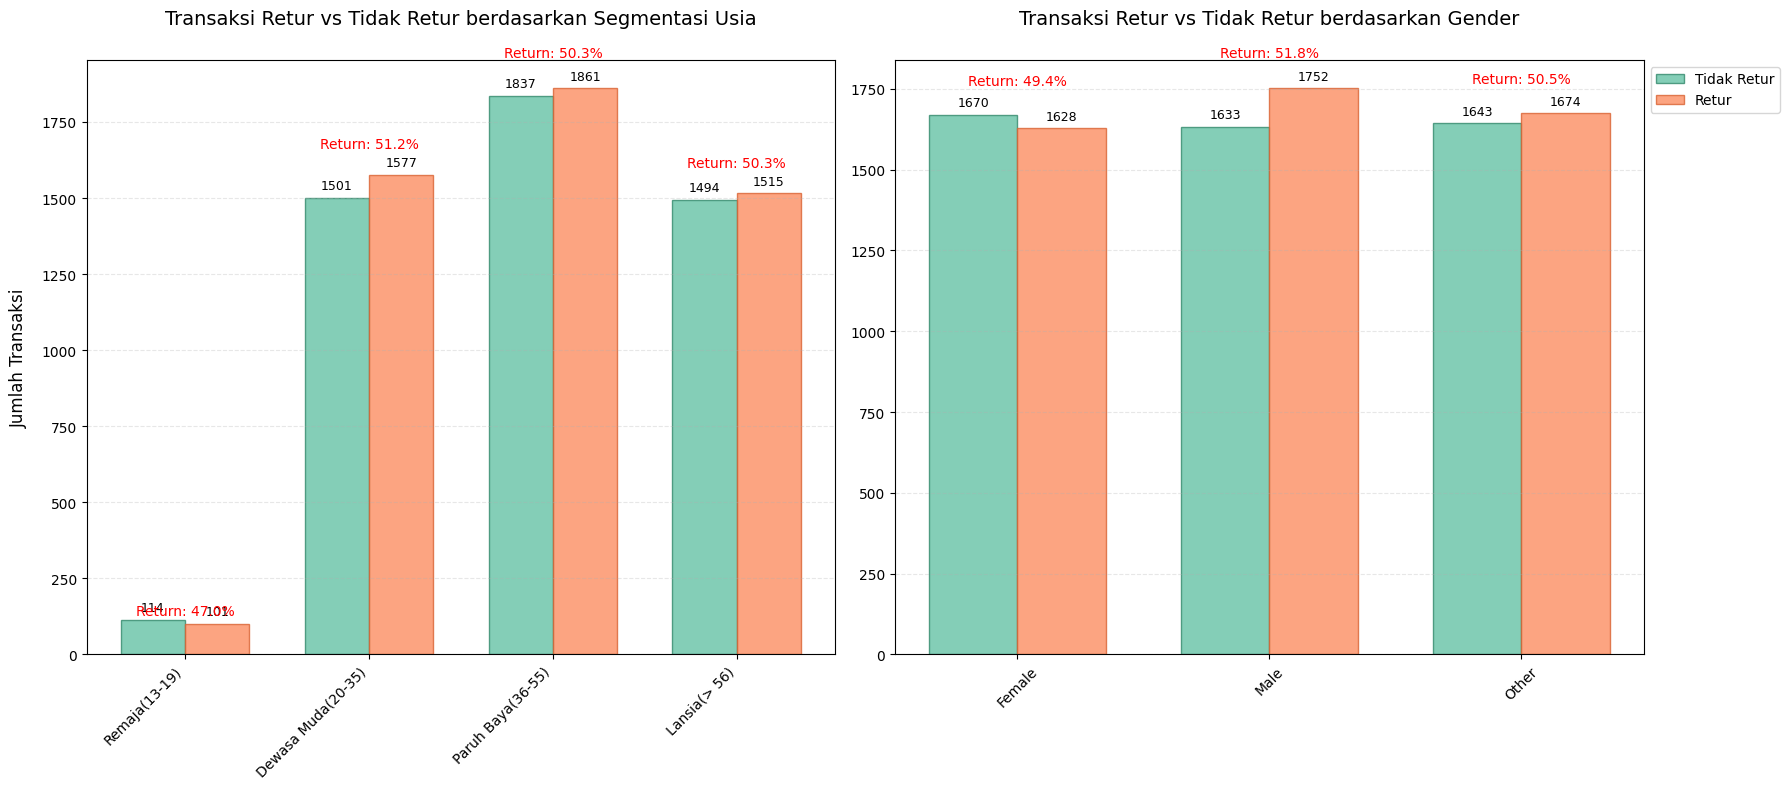

In [23]:
# Hitung transaksi berhasil dan retur untuk setiap segmentasi
segment_analysis = df_clean.groupby(['AgeSegment', 'Gender'], observed=False).agg(
    total_transactions=('TransactionID', 'count'),
    returned_transactions=('ReturnFlag', 'sum')).reset_index()

segment_analysis['successful_transactions'] = segment_analysis['total_transactions'] - segment_analysis['returned_transactions']

# Buat visualisasi
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Subplot 1: Segmentasi Usia - Retur vs Tidak Retur
age_segment_data = df_clean.groupby('AgeSegment', observed=False).agg(
    total_transactions=('TransactionID', 'count'),
    returned_transactions=('ReturnFlag', 'sum')).reset_index()

age_segment_data['successful_transactions'] = age_segment_data['total_transactions'] - age_segment_data['returned_transactions']

# Filter hanya segmentasi yang memiliki transaksi
age_segment_data = age_segment_data[age_segment_data['total_transactions'] > 0]

x_pos = np.arange(len(age_segment_data))
width = 0.35

bars_success_age = ax1.bar(x_pos - width/2, age_segment_data['successful_transactions'], width,
                          label='Tidak Retur', color='#66c2a5', edgecolor='#32886b', alpha=0.8)
bars_return_age = ax1.bar(x_pos + width/2, age_segment_data['returned_transactions'], width,
                         label='Retur', color='#fc8d62', edgecolor='#d96232', alpha=0.8)

ax1.set_title('Transaksi Retur vs Tidak Retur berdasarkan Segmentasi Usia\n', fontsize=14, pad=10)
ax1.set_ylabel('Jumlah Transaksi', fontsize=12, labelpad=10)
ax1.set_xlabel('')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(age_segment_data['AgeSegment'], rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Tambahkan nilai dan persentase untuk segmentasi usia
for i, (success, return_val, total) in enumerate(zip(age_segment_data['successful_transactions'],
                                                    age_segment_data['returned_transactions'],
                                                    age_segment_data['total_transactions'])):
    return_percentage = (return_val / total) * 100 if total > 0 else 0

    ax1.text(i - width/2, success + max(age_segment_data['successful_transactions']) * 0.01,
             f'{int(success)}', ha='center', va='bottom', fontsize=9)
    ax1.text(i + width/2, return_val + max(age_segment_data['returned_transactions']) * 0.01,
             f'{int(return_val)}', ha='center', va='bottom', fontsize=9)

    if total > 0:
        ax1.text(i, max(success, return_val) * 1.05,
                 f'Return: {return_percentage:.1f}%', ha='center', va='bottom',
                 fontsize=10, color='red')

# Subplot 2: Gender - Retur vs Tidak Retur
gender_data = df_clean.groupby('Gender', observed=False).agg(
    total_transactions=('TransactionID', 'count'),
    returned_transactions=('ReturnFlag', 'sum')).reset_index()

gender_data['successful_transactions'] = gender_data['total_transactions'] - gender_data['returned_transactions']

# Filter hanya gender yang memiliki transaksi
gender_data = gender_data[gender_data['total_transactions'] > 0]

x_pos_gender = np.arange(len(gender_data))
width_gender = 0.35

bars_success_gender = ax2.bar(x_pos_gender - width_gender/2, gender_data['successful_transactions'], width_gender,
                             label='Tidak Retur', color='#66c2a5', edgecolor='#32886b', alpha=0.8)
bars_return_gender = ax2.bar(x_pos_gender + width_gender/2, gender_data['returned_transactions'], width_gender,
                            label='Retur', color='#fc8d62', edgecolor='#d96232', alpha=0.8)

ax2.set_title('Transaksi Retur vs Tidak Retur berdasarkan Gender\n', fontsize=14, pad=10)
ax2.set_ylabel('')
ax2.set_xlabel('')
ax2.set_xticks(x_pos_gender)
ax2.set_xticklabels(gender_data['Gender'], rotation=45)
ax2.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Tambahkan nilai dan persentase untuk gender
for i, (success, return_val, total) in enumerate(zip(gender_data['successful_transactions'],
                                                   gender_data['returned_transactions'],
                                                   gender_data['total_transactions'])):
    return_percentage = (return_val / total) * 100 if total > 0 else 0

    ax2.text(i - width_gender/2, success + max(gender_data['successful_transactions']) * 0.01,
             f'{int(success)}', ha='center', va='bottom', fontsize=9)
    ax2.text(i + width_gender/2, return_val + max(gender_data['returned_transactions']) * 0.01,
             f'{int(return_val)}', ha='center', va='bottom', fontsize=9)

    if total > 0:
        ax2.text(i, max(success, return_val) * 1.05,
                 f'Return: {return_percentage:.1f}%', ha='center', va='bottom',
                 fontsize=10, color='red')

plt.tight_layout()
plt.show()

Segmentasi Usia
- Remaja (13–19): tingkat retur relatif rendah (47,1%), artinya lebih banyak transaksi yang tidak diretur.
- Dewasa Muda (20–35): retur cukup tinggi (51,2%), menunjukkan kelompok ini paling sering melakukan retur.
- Paruh Baya (36–55): retur juga tinggi (50,3%), seimbang dengan transaksi berhasil.
- Lansia (>56): hampir setara antara retur dan tidak retur (50,3%).

Gender
- Female: tingkat retur relatif rendah (49,4%), lebih banyak transaksi berhasil.
- Male: tingkat retur tertinggi (51,8%) → segmen paling rawan retur.
- Other: tingkat retur seimbang (50,5%).
- Male mendominasi tingkat retur, sementara Female lebih cenderung mempertahankan transaksi.

###**Tingkat Retur Pembelian Berdasarkan Lokasi**

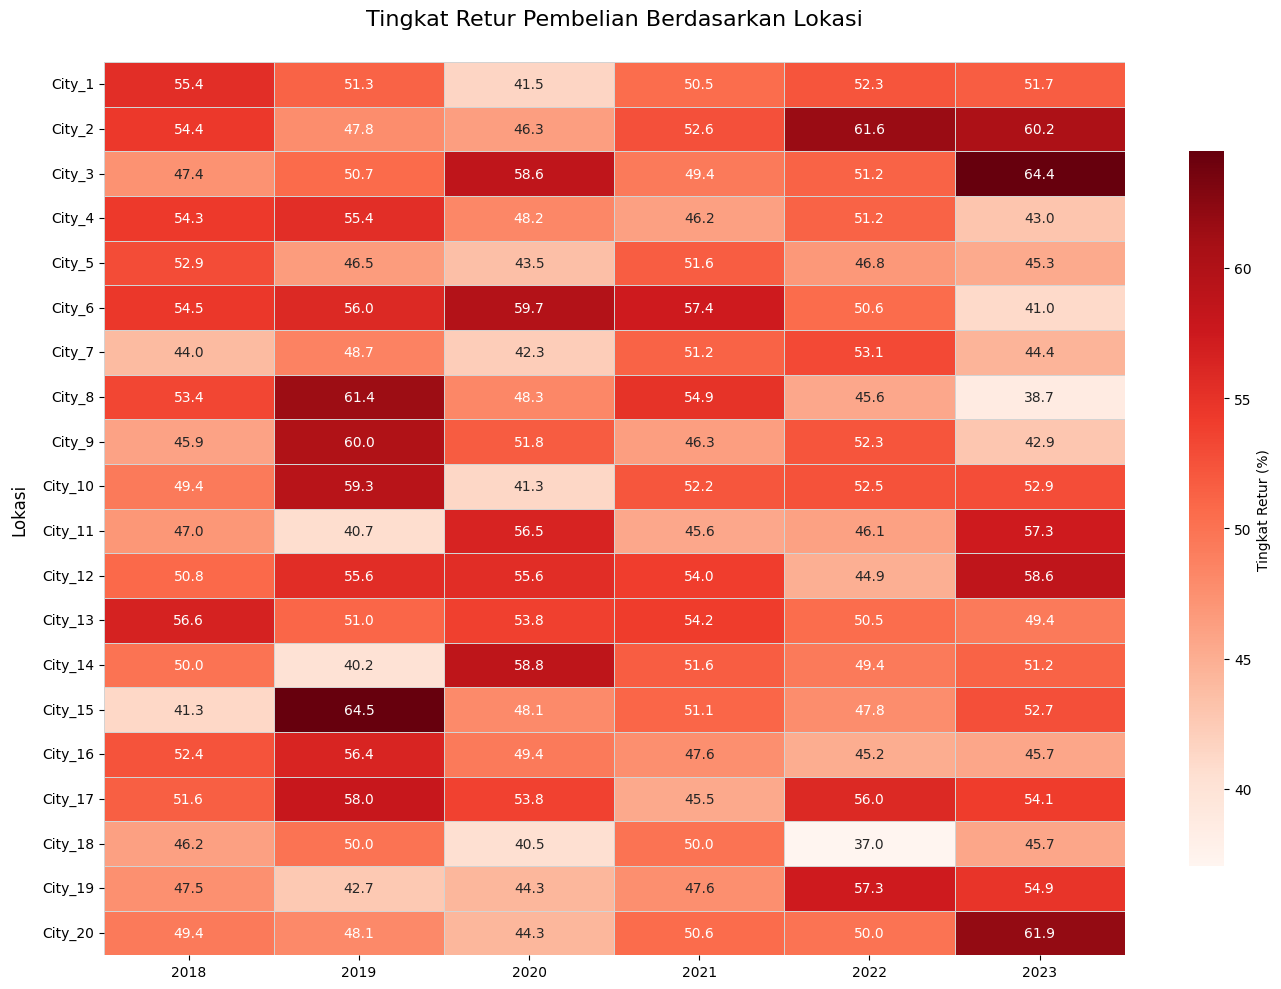

In [24]:
# Hitung tingkat retur per lokasi per tahun
return_rates_by_location = df_clean.groupby(['Year', 'Location']).agg(
    total_transactions=('TransactionID', 'count'),
    returned_transactions=('ReturnFlag', 'sum')).reset_index()

return_rates_by_location['return_rate'] = (return_rates_by_location['returned_transactions'] /
                                         return_rates_by_location['total_transactions']) * 100

# Pivot data untuk heatmap
heatmap_data = return_rates_by_location.pivot(index='Location', columns='Year', values='return_rate')
heatmap_data = heatmap_data.sort_index(key=lambda x: x.str.extract(r'(\d+)').astype(int).squeeze())

# Buat visualisasi heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data,
            annot=True,
            fmt='.1f',
            cmap='Reds',
            linewidths=0.5,
            linecolor='lightgray',
            cbar_kws={'label': 'Tingkat Retur (%)', 'shrink': 0.8})

plt.title('Tingkat Retur Pembelian Berdasarkan Lokasi\n', fontsize=16, pad=10)
plt.xlabel('')
plt.ylabel('Lokasi', fontsize=12, labelpad=10)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.grid(False)
plt.tight_layout()
plt.show()

- Rentang retur cukup bervariasi antar kota, mulai dari kisaran rendah ~37% (City_18 tahun 2022) hingga sangat tinggi ~64% (City_15 tahun 2019, City_3 tahun 2023).
- Tidak semua kota menunjukkan tren naik/turun konsisten, tetapi ada pola fluktuatif setiap tahunnya.
- 2019 dan 2023 terlihat sebagai periode dengan tingkat retur relatif tinggi di banyak kota.
- 5 Kota dengan retur paling tinggi di tahun 2023:\
 City_3 (64,4%), City_2 (60,2%), City_19 (54,9%), City_12 (58,6%), dan City_20 (61,9%).
- 5 Kota dengan retur paling rendah di tahun 2023:\
 City_8 (38,7%), City_6 (41,0%), City_4 (43,0%), City_5 (45,3%), dan City_16 (45,7%).

###**Tingkat Retur Pembelian Berdasarkan StoreID**

Analisis ini menjelaskan tingkat retur untuk pembelian langsung di toko (offline).

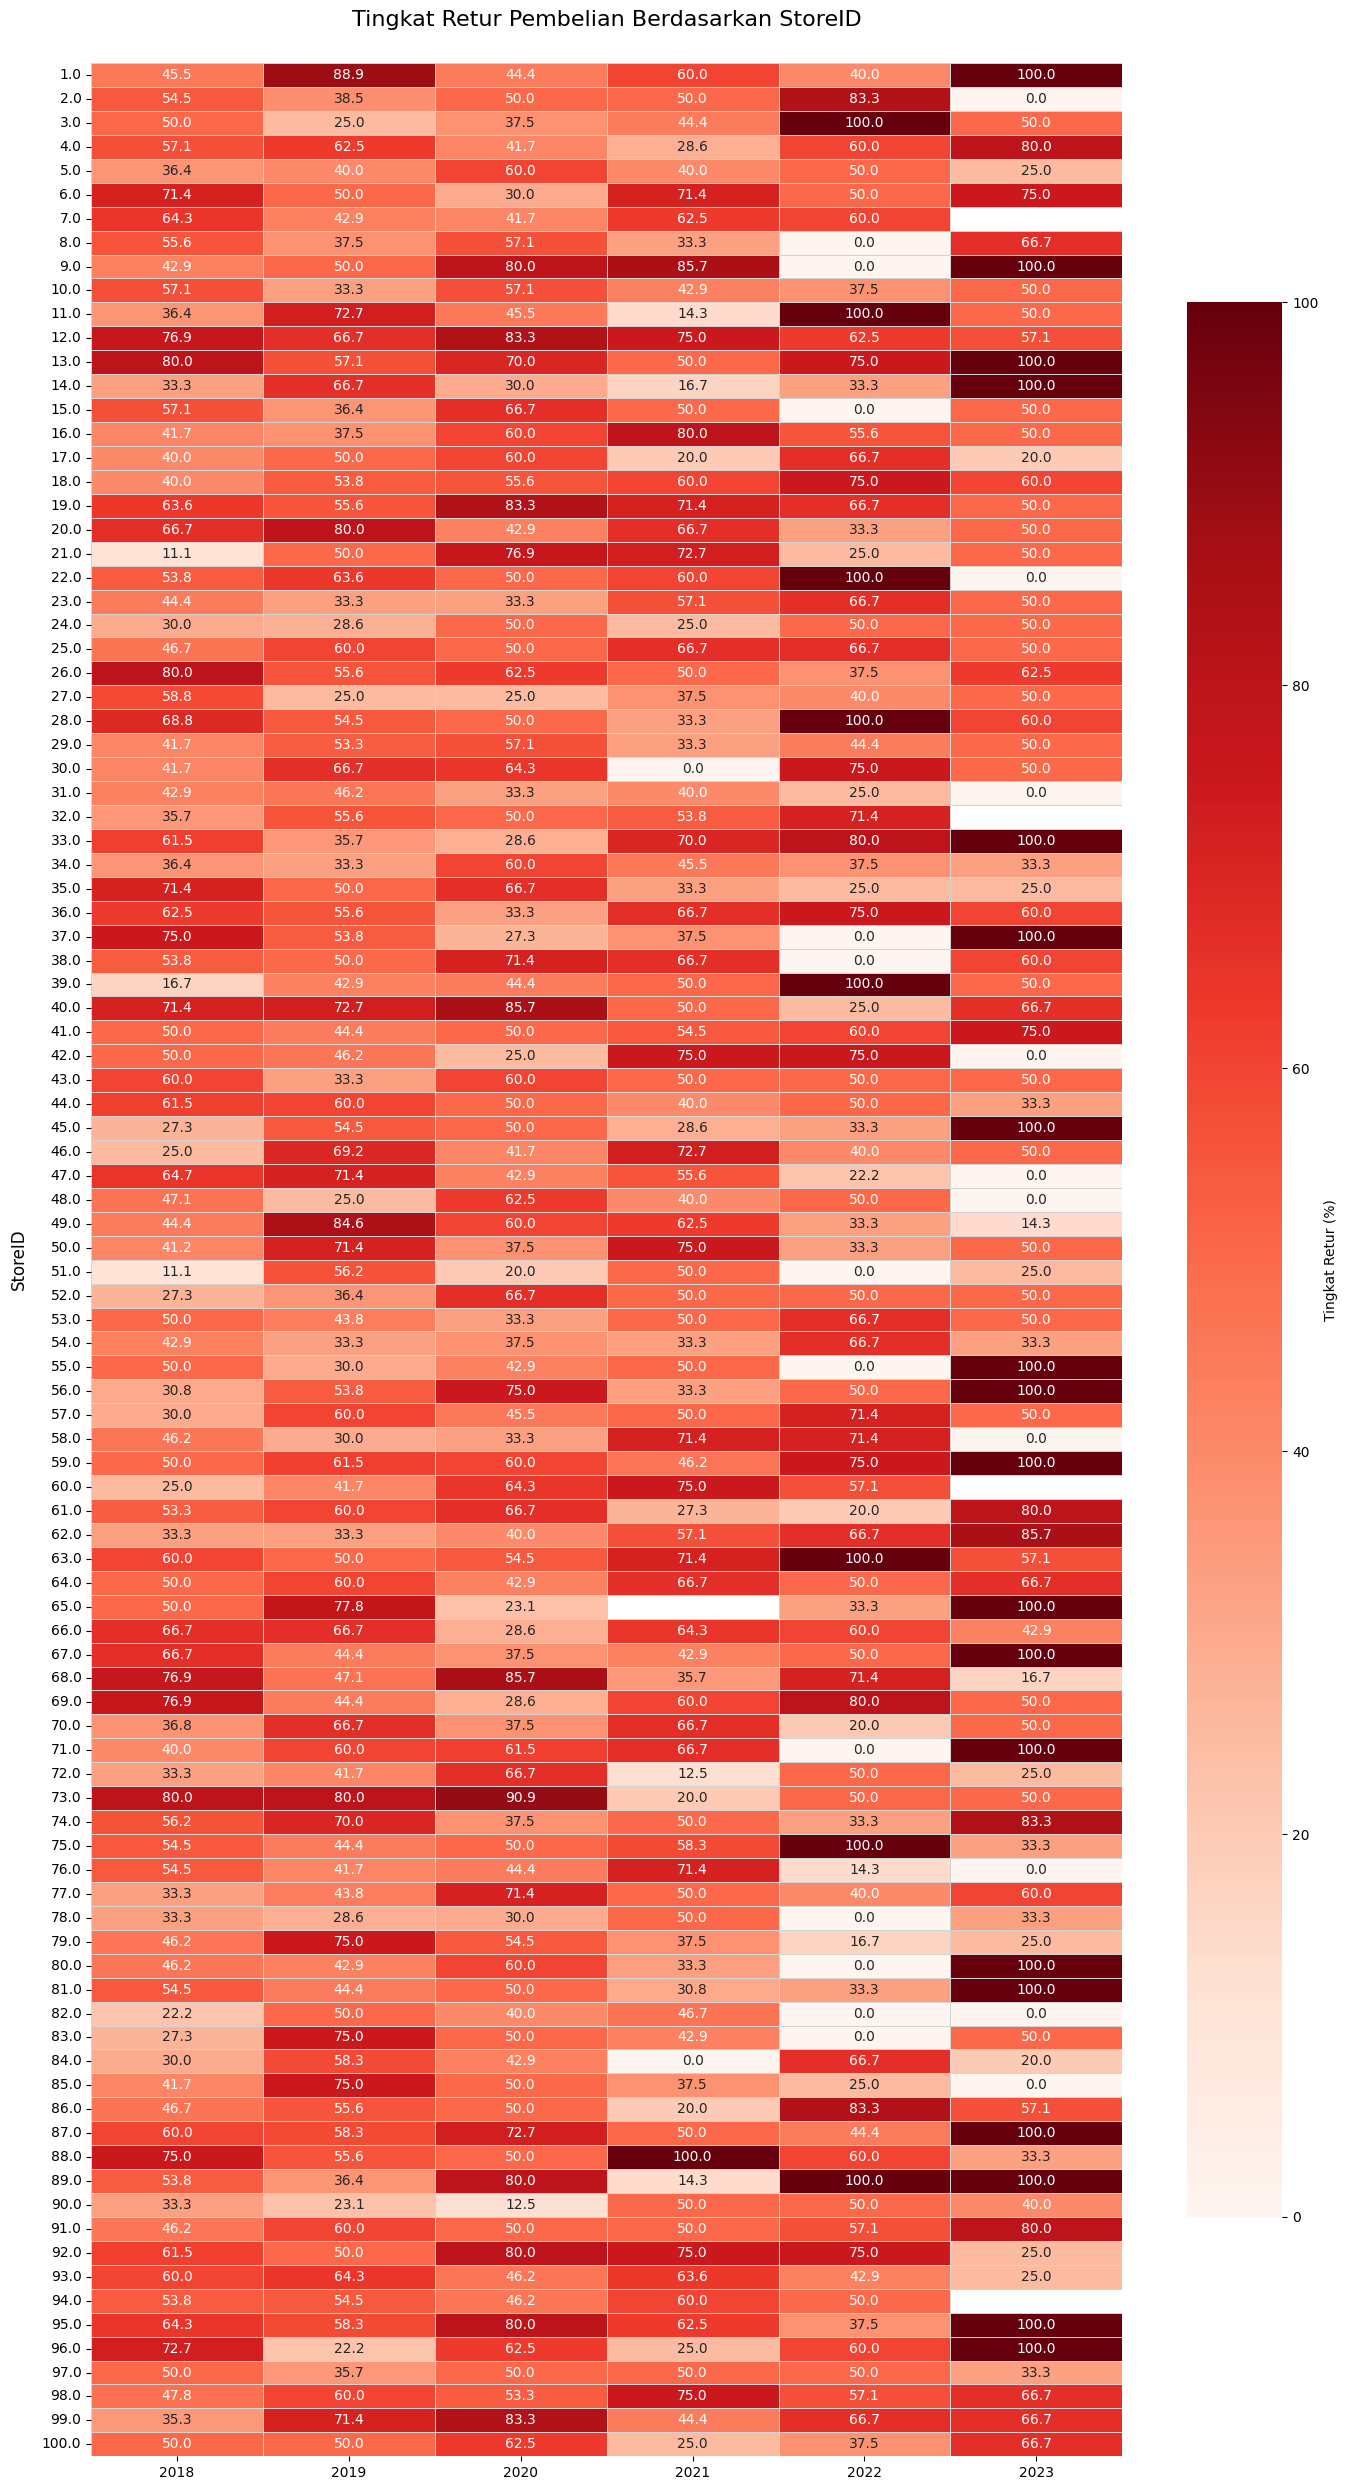

In [30]:
# Filter data untuk mengecualikan StoreID "Online"
df_store = df_clean[df_clean['StoreID'] != 'Online']

# Hitung tingkat retur per StoreID per tahun
return_rates_by_store = df_store.groupby(['Year', 'StoreID']).agg(
    total_transactions=('TransactionID', 'count'),
    returned_transactions=('ReturnFlag', 'sum')).reset_index()

return_rates_by_store['return_rate'] = (return_rates_by_store['returned_transactions'] /
                                      return_rates_by_store['total_transactions']) * 100

# Pivot data untuk heatmap
heatmap_data = return_rates_by_store.pivot(index='StoreID', columns='Year', values='return_rate')
heatmap_data = heatmap_data.sort_index(key=lambda x: x.str.extract(r'(\d+)').astype(int).squeeze())

# Buat visualisasi heatmap
plt.figure(figsize=(14, 25))
sns.heatmap(heatmap_data,
            annot=True,
            fmt='.1f',
            cmap='Reds',
            linewidths=0.5,
            linecolor='lightgray',
            cbar_kws={'label': 'Tingkat Retur (%)', 'shrink': 0.8})

plt.title('Tingkat Retur Pembelian Berdasarkan StoreID\n', fontsize=16, pad=10)
plt.xlabel('')
plt.ylabel('StoreID', fontsize=12, labelpad=10)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.grid(False)
plt.tight_layout()
plt.show()

- Tingkat retur bervariasi sangat lebar antar store, dari 0% hingga 100%.
- Beberapa store konsisten dengan tingkat retur sangat tinggi (>70%), misalnya Store 6, 43, 50, 65, 67, 76, 95.
- Terdapat pula beberapa store dengan tingkat retur ekstrem 100%, misalnya Store 1, 9, 13, 14, 33, 37, 45, 55, 56, 59.
- Sebaliknya, ada store dengan tingkat retur rendah (0–20%), misalnya Store 53, 54, 55, 62, 83, 84, 85.
- Fluktuasi signifikan terlihat antar tahun di sejumlah store, menunjukkan performa retur yang tidak stabil.
- Sel-sel kosong (bukan 0) mengindikasikan store tersebut ditutup pada periode tersebut.
- Pola ini menunjukkan adanya perbedaan performa yang sangat tajam antar store, sehingga sebagian kecil store menjadi penyumbang retur terbesar, sementara mayoritas lainnya relatif lebih terkendali.

###**Persentase Retur Berdasarkan Metode Pembayaran**

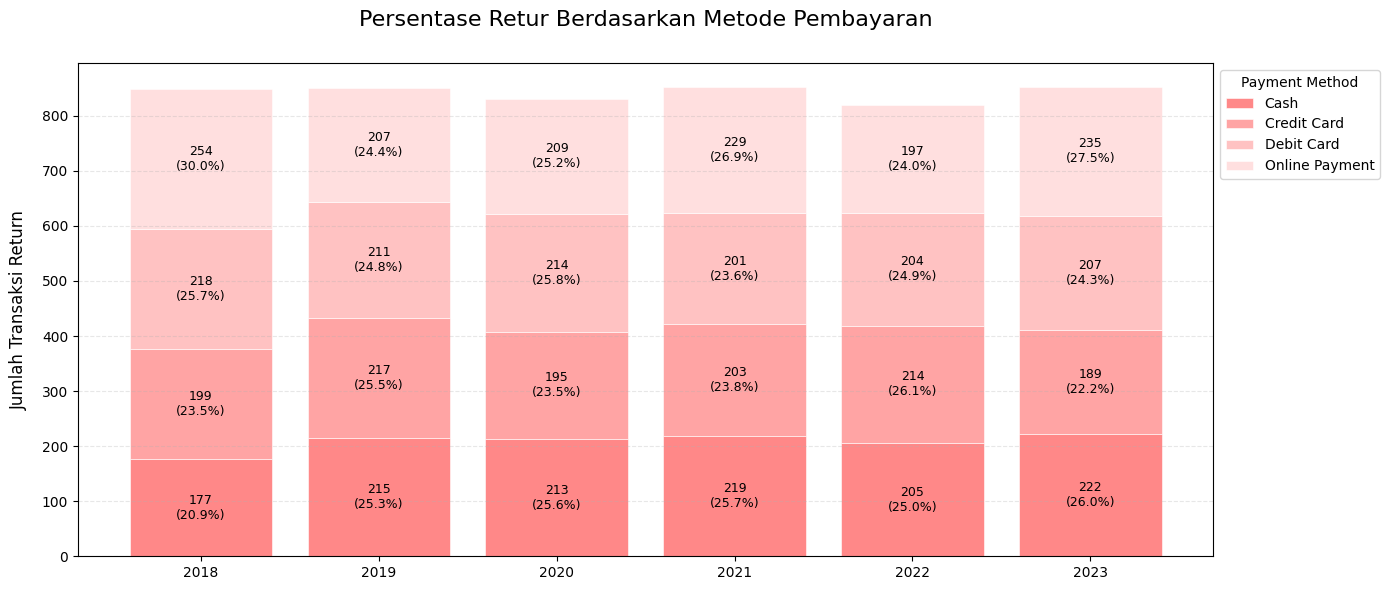

In [26]:
# Hitung transaksi return per metode pembayaran
return_analysis = df_clean.groupby(['Year', 'PaymentType']).agg(
    returned_transactions=('ReturnFlag', 'sum')).reset_index()

# Hitung persentase return per metode pembayaran
total_returns_per_year = return_analysis.groupby('Year')['returned_transactions'].transform('sum')
return_analysis['return_percentage'] = (return_analysis['returned_transactions'] / total_returns_per_year) * 100

# Pivot data untuk stacked bar chart
pivot_data = return_analysis.pivot(index='Year', columns='PaymentType', values='returned_transactions')

# Visualisasi stacked bar chart
plt.figure(figsize=(14, 6))

colors = ['#ff6b6b', '#ff8e8e', '#ffb3b3', '#ffd8d8', '#ff9e9e', '#ffc4c4']

# Plot stacked bars untuk setiap tahun
years = pivot_data.index
payment_methods = pivot_data.columns
bottom = np.zeros(len(years))

for i, method in enumerate(payment_methods):
    plt.bar(years, pivot_data[method],
            bottom=bottom,
            label=method,
            color=colors[i % len(colors)],
            alpha=0.8,
            edgecolor='white',
            linewidth=0.5)

    bottom += pivot_data[method].values

# Tambahkan nilai persentase dan jumlah di setiap segment
for year in years:
    year_data = return_analysis[return_analysis['Year'] == year]
    cumulative_height = 0

    for _, row in year_data.iterrows():
        method = row['PaymentType']
        returns = row['returned_transactions']
        percentage = row['return_percentage']

        if returns > 0:
            plt.text(year, cumulative_height + returns/2,
                     f'{returns}\n({percentage:.1f}%)',
                     ha='center', va='center', fontsize=9,
                     color='black')

        cumulative_height += returns

plt.title('Persentase Retur Berdasarkan Metode Pembayaran\n', fontsize=16, pad=10)
plt.xlabel('')
plt.ylabel('Jumlah Transaksi Return', fontsize=12, labelpad=10)
plt.xticks(years)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title='Payment Method')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

- Distribusi retur relatif seimbang di antara semua metode pembayaran (Cash, Credit Card, Debit Card, Online Payment), masing-masing berkisar 22–30% setiap tahunnya.
- Online Payment cenderung memiliki porsi retur yang lebih tinggi pada awal periode (30% di 2018), meskipun menurun di tengah periode, lalu kembali naik di 2023 (27,5%).
- Cash menunjukkan tren peningkatan stabil dalam kontribusi retur, dari 20,9% (2018) menjadi 26,0% (2023).
- Credit Card dan Debit Card relatif konsisten di kisaran 23–26%, tanpa perubahan mencolok dari tahun ke tahun.
- Secara umum, tidak ada satu metode pembayaran yang dominan sebagai penyebab retur, tetapi ada pola peningkatan di Cash dan Online Payment yang patut diperhatikan.

###**Persentase Retur Berdasarkan Waktu dan Metode Pengiriman**

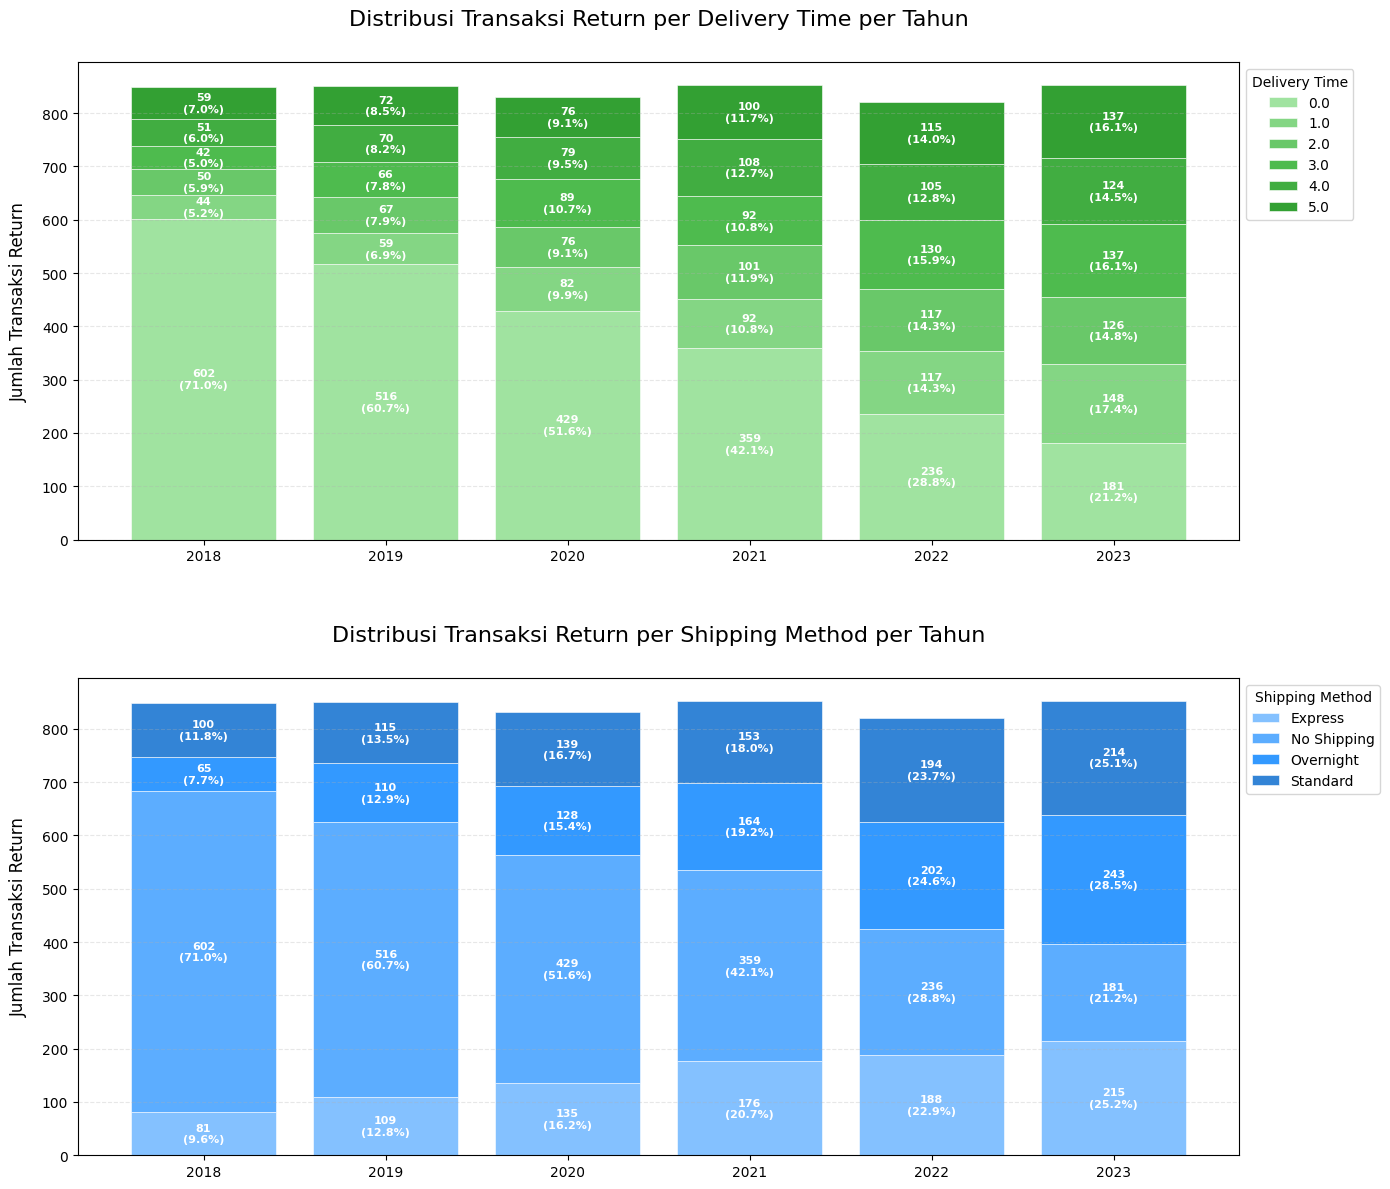

In [27]:
# Hitung transaksi return per DeliveryTime dan ShippingMethod
return_analysis = df_clean.groupby(['Year', 'DeliveryTime', 'ShippingMethod']).agg(
    returned_transactions=('ReturnFlag', 'sum')).reset_index()

# Hitung persentase return per kategori
total_returns_per_year = return_analysis.groupby('Year')['returned_transactions'].transform('sum')
return_analysis['return_percentage'] = (return_analysis['returned_transactions'] / total_returns_per_year) * 100

# Buat visualisasi untuk DeliveryTime
plt.figure(figsize=(14, 12))
plt.subplot(2, 1, 1)

# Pivot data untuk DeliveryTime
pivot_delivery = return_analysis.groupby(['Year', 'DeliveryTime'])['returned_transactions'].sum().unstack()
delivery_colors = ['#88DD88', '#66CC66', '#44BB44', '#22AA22', '#119911', '#008800']

# Plot stacked bars untuk DeliveryTime
years = pivot_delivery.index
delivery_times = pivot_delivery.columns
bottom = np.zeros(len(years))

for i, delivery_time in enumerate(delivery_times):
    plt.bar(years, pivot_delivery[delivery_time],
            bottom=bottom,
            label=delivery_time,
            color=delivery_colors[i % len(delivery_colors)],
            alpha=0.8,
            edgecolor='white',
            linewidth=0.5)

    bottom += pivot_delivery[delivery_time].values

# Tambahkan nilai persentase dan jumlah di setiap segment
for year in years:
    year_data = return_analysis[return_analysis['Year'] == year]
    delivery_data = year_data.groupby('DeliveryTime')['returned_transactions'].sum()
    total_year = delivery_data.sum()

    cumulative_height = 0
    for delivery_time in delivery_times:
        if delivery_time in delivery_data:
            returns = delivery_data[delivery_time]
            percentage = (returns / total_year) * 100

            if returns > 0:
                plt.text(year, cumulative_height + returns/2,
                         f'{returns}\n({percentage:.1f}%)',
                         ha='center', va='center', fontsize=8, fontweight='bold',
                         color='white')

            cumulative_height += returns

plt.title('Distribusi Transaksi Return per Delivery Time per Tahun\n', fontsize=16, pad=10)
plt.xlabel('')
plt.ylabel('Jumlah Transaksi Return', fontsize=12, labelpad=10)
plt.xticks(years)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title='Delivery Time')
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Subplot 2: ShippingMethod
plt.subplot(2, 1, 2)

# Pivot data untuk ShippingMethod
pivot_shipping = return_analysis.groupby(['Year', 'ShippingMethod'])['returned_transactions'].sum().unstack()
shipping_colors = ['#66B2FF', '#3399FF', '#0080FF', '#0066CC']

# Plot stacked bars untuk ShippingMethod
years = pivot_shipping.index
shipping_methods = pivot_shipping.columns
bottom = np.zeros(len(years))

for i, shipping_method in enumerate(shipping_methods):
    plt.bar(years, pivot_shipping[shipping_method],
            bottom=bottom,
            label=shipping_method,
            color=shipping_colors[i % len(shipping_colors)],
            alpha=0.8,
            edgecolor='white',
            linewidth=0.5)

    bottom += pivot_shipping[shipping_method].values

# Tambahkan nilai persentase dan jumlah di setiap segment
for year in years:
    year_data = return_analysis[return_analysis['Year'] == year]
    shipping_data = year_data.groupby('ShippingMethod')['returned_transactions'].sum()
    total_year = shipping_data.sum()

    cumulative_height = 0
    for shipping_method in shipping_methods:
        if shipping_method in shipping_data:
            returns = shipping_data[shipping_method]
            percentage = (returns / total_year) * 100

            if returns > 0:
                plt.text(year, cumulative_height + returns/2,
                         f'{returns}\n({percentage:.1f}%)',
                         ha='center', va='center', fontsize=8, fontweight='bold',
                         color='white')

            cumulative_height += returns

plt.title('\n\nDistribusi Transaksi Return per Shipping Method per Tahun\n', fontsize=16, pad=10)
plt.xlabel('')
plt.ylabel('Jumlah Transaksi Return', fontsize=12, labelpad=10)
plt.xticks(years)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title='Shipping Method')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

Delivery Time
- Pembelian langsung (delivery time = 0) mendominasi retur di awal periode (71% tahun 2018), kemudian turun drastis menjadi 21,2% di 2023.
- Sementara itu, retur dengan delivery time lebih lama (3–5 hari) terus meningkat: dari hanya sekitar 5–9% (2018–2019) menjadi 14–16% (2023).
- Meskipun menurun tajam, pembelian langsung tetap menjadi kategori retur terbesar hingga tahun 2023.
- Berdasarkan tren yang ada, semakin lama waktu pengiriman, semakin tinggi kontribusi returnya.

Shipping Method
- Pembelian langsung (No Shipping) masih mendominasi di awal periode (71% pada 2018) namun mengalami penurunan tajam hingga 21,2% pada 2023.
- Standard terus meningkat secara konsisten, dari 11,8% (2018) menjadi 25,1% (2023).
- Overnight juga naik cukup signifikan, dari 7,7% (2018) ke 28,5% (2023).
- Express meningkat perlahan tapi stabil, dari 9,6% (2018) ke 25,2% (2023).
- Secara umum, dalam 5 tahun terakhir terjadi pergeseran return dari “No Shipping” ke metode pengiriman reguler dan cepat (Express, Overnight, dan Standard), yang kini porsinya hampir setara.

### **Kesimpulan**

Berdasarkan hasil analisis, retur menjadi fenomena konsisten yang mendominasi hampir di setiap dimensi yang diamati. Perbandingan transaksi berhasil dan retur menunjukkan adanya gap signifikan pada periode tertentu, khususnya tahun 2019 dan 2023, yang menandakan efektivitas penjualan masih menghadapi tantangan besar. Pola retur juga berbeda-beda tergantung channel, kategori produk, segmentasi demografi, lokasi, serta masing-masing store. Beberapa kategori seperti Decorations, Toys, dan Electronics sering menempati posisi teratas dalam kontribusi retur, sementara Clothing relatif membaik dengan tren penurunan retur. Dari sisi pelanggan, kelompok usia dewasa muda dan paruh baya serta laki-laki tercatat paling rawan melakukan retur. Variasi juga terlihat di tingkat lokasi, di mana sejumlah kota dan store tertentu memiliki persentase retur sangat tinggi, bahkan hingga ekstrem 100%.

Dari sisi metode pembayaran, distribusi retur cenderung merata di semua opsi, namun terdapat indikasi kenaikan pada pembayaran Cash dan Online Payment. Sementara itu, dari dimensi pengiriman, terdapat pergeseran yang jelas: retur yang sebelumnya didominasi pembelian langsung (No Shipping atau delivery time = 0) kini bergeser ke metode pengiriman reguler maupun cepat, seperti Standard, Express, dan Overnight.

Saran pengembangan ke depan:

**1. Perbaikan Kualitas Produk dan Akurasi Deskripsi**
- Fokus pada Kategori Prioritas: Tingkatkan kontrol kualitas dan akurasi deskripsi untuk kategori dengan retur tinggi (Decorations, Toys, dan Electronics)
- Uji Coba dan Quality Check: Implementasikan uji coba produk yang lebih ketat, sebelum dikirim ke pelanggan.
- Konten yang Jelas dan Akurat: Gunakan gambar resolusi tinggi, video, dan deskripsi yang detail untuk memastikan ekspektasi pelanggan sesuai dengan produk yang diterima.

**2. Strategi Berdasarkan Segmentasi Pelanggan**
- Targetkan Segmen Rawan Retur: Buat kampanye edukasi dan kebijakan pembelian yang lebih jelas untuk segmen pelanggan dengan tingkat retur tertinggi, yaitu pria (Male) dan kelompok usia Dewasa Muda serta Paruh Baya.
- Tingkatkan Engagement: Lakukan survei kepuasan atau follow-up khusus kepada segmen ini untuk memahami akar penyebab retur dan meningkatkan pengalaman belanja mereka.

**3. Optimasi Operasional dan Logistik**
- Perbaiki Kinerja Pengiriman: Tingkatkan penanganan paket untuk mengurangi kerusakan selama pengiriman.
- Evaluasi Kemitraan Logistik: Lakukan audit kinerja pada penyedia jasa pengiriman di kota-kota dengan tingkat retur sangat tinggi. Pertimbangkan untuk mengganti mitra logistik yang performanya buruk.
- Transparansi dan Komunikasi: Berikan pelacakan (tracking) yang real-time dan notifikasi yang proaktif kepada pelanggan mengenai status pengiriman untuk mengelola ekspektasi.

**4. Peningkatan Kinerja Toko Offline**
- Identifikasi Toko Bermasalah: Lakukan investigasi mendalam pada toko (store) dengan tingkat retur konsisten tinggi dan ekstrem. Masalahnya mungkin terletak pada pelatihan staf, kualitas produk, atau proses penjualan.
- Standardisasi Pelatihan: Terapkan pelatihan standar dan sertifikasi untuk staf penjualan di semua toko.
- Reward and Punishment: Berikan insentif untuk toko dengan tingkat retur terendah dan tinjau ulang operasional toko dengan performa retur yang sangat buruk.

**5. Kebijakan dan Proses Retur yang Lebih Cerdas**
- Analisis Penyebab Retur: Implementasikan sistem kategorisasi alasan retur yang lebih detail (misalnya, produk rusak, tidak sesuai deskripsi, salah kirim) untuk mengidentifikasi masalah spesifik dan mengambil tindakan yang tepat.
- Sederhanakan Proses: Meski retur perlu diminimalisir, pastikan proses retur yang ada tetap mudah dan tidak berbelit bagi pelanggan yang memang membutuhkannya, untuk menjaga loyalitas.

**6. Komunikasi dan Edukasi Pelanggan**
- Konfirmasi Pembelian: Untuk pembelian online, implementasikan langkah konfirmasi tambahan (misalnya, pop-up yang menanyakan "Apakah Anda yakin dengan ukuran/warna ini?") terutama untuk kategori produk yang rawan retur.
- Sediakan Panduan yang Jelas: Berikan panduan ukuran (size guide) yang interaktif untuk kategori Clothing dan Toys, yang telah menunjukkan penurunan retur dan bisa menjadi best practice.
- Bangun Komunitas: Manfaatkan ulasan dan rating dari pelanggan yang sudah membeli untuk membantu calon pembeli dalam mengambil keputusan yang tepat.